# L1 多臂老虎机（Multi-armed bandit problem, K-armed bandit problem, MAB）
---
假设有K个老虎机，每一个臂（action)的回报都不是固定的，但是你并不知道他的回报是多少，你如何在T个回合内最大自己的回报呢？

在互联网行业，可以将老虎机问题看成是广告投放问题，每一个臂（action）就是一种广告投放方式，用户看到广告，对每一个广告有一个固定点击率，平台需要寻找最优策略，最大化自己的收益。

# 一、朴素Bandit算法

最朴素的Bandit算法就是：先随机试若干次，计算每个臂的平均收益，一直选均值最大那个臂。这个算法是人类在实际中最常采用的，不可否认，它还是比随机乱猜要好。

# 二、epsilon-Greedy策略流程如下：
epsilon-Greedy算法（ϵ-贪婪算法）算是MBA(Multiarmed Bandit Algorithms)算法中最简单的一种。因为是MBA算法介绍的第一篇，所以在这里还是先简单说明下MBA。当然，要解释MBA，首先就得EE问题（Explore-Exploit dilemma）。
什么是EE问题呢？ 这两个”E”，其中一个代表“exploit”,中文可译作“利用”；另一个代表“Explore”,中文可译作“探索”。结合一个例子可能更方便对EE,及MBA作一个简单的解释。如果之前已经有了解了的，建议直接跳过下面这段。

现在假如你面前有n台老虎机，每台老虎机吐钱的概率不一样。你并不清楚每台老虎机的吐钱的概率分布。那么，如果你想要最大化收益，你该怎么办呢？ 通常来说，你内心可能有两种好的决策：
1. 找到某一台收益还不错的老虎机，然后坚持摇这台老虎机；
2. 不断尝试探索新

https://pic2.zhimg.com/v2-1c9cf0b0a15f84a386487878e8b51b65_r.jpg

输入：摇臂的数量K，奖赏函数R、尝试的次数T（通常T>K)、探索概率Eps

输出：平均累计奖赏

过程：

初始化：r[0]=0一开始的奖赏为0，对于任意的老虎机，平均奖赏Q(i)=0, 每一个老虎机 被选择的次数Count(i) =0

对于每一次尝试t，执行以下操作：

- 如果 产生的[0,1]之间的随机数<eps: 本次选择的老虎机在K个老虎机中随机选择
- 如果 产生的[0,1]之间的随机数>=eps: 本次选择的老虎机是 老虎机中平均奖赏最高的那个
- v=R(k)是更新奖励函数，其中R是奖励函数，v就是第t次选择第k个老虎机的奖励
- r[t]是第 t 步平均累计奖赏，首先要对之前t-1步奖励求和，加上第t步奖励，最后求平均
- 更新 第k个摇臂的平均回报
- 更新 第k个摇臂当前被选择的次数

# 三、Boltzmann策略流程如下：

# 四、UCB策略流程如下：

# 五、Thompson sampling算法

假设每个臂是否产生收益，其背后有一个概率分布，产生收益的概率为p。
我们不断地试验，去估计出一个置信度较高的“概率p的概率分布”就能近似解决这个问题了。
怎么能估计“概率p的概率分布”呢？

答案是假设概率p的概率分布符合beta(wins, lose)分布，它有两个参数: wins, lose。
每个臂都维护一个beta分布的参数。每次试验后，选中一个臂，摇一下，有收益则该臂的wins增加1，否则该臂的lose增加1。
每次选择臂的方式是：用每个臂现有的beta分布产生一个随机数b，选择所有臂产生的随机数中最大的那个臂去摇。


# 五、代码实现 （python)
在多臂赌博机的实际环境下测试贪心策略，玻尔兹曼策略，UCB策略。
第一步：要定义一些多臂赌博机系统的基本信息。

第二步：训练
    a,选动作，以怎么样的方式选策略。例如：贪心策略，玻尔兹曼策略，UCB策略。
    b,将动作发给环境，环境给出即时奖励。
第三步：做图，x：玩家玩游戏的总的次数，y：累加奖励。
            i,                 sum_reward(i)
"""
# 第一步：要定义一些多臂赌博机系统的基本信息。

In [48]:
# 首先定义一个类
class Bandit:
    # 多臂赌博机系统的基本信息。
    # 1.多臂赌博机的基本信息(假设只有三台赌博机)
    # 2.玩家玩的总场数。counts
    # 3.玩家发出的动作。action
    # 4.当前赌博机获得的即时奖励。current_reward
    # 5.第i台赌博机的总的奖励。sum_reward
    # 6.第i台赌博机的台t-1时刻的平均奖励。average_reward,当前时刻为t时刻。
    # 7.每个臂摇动的次数。
    # 8.总奖励total_reward

    def __init__(self):
        self.arm_values = np.random.normal(0,1,10)       #arm_values 各臂收益的真实值
        self.K = np.zeros(10)                            #K=10 个臂
        self.est_values = np.zeros(10)                   # est_values 各臂收益初始估计值 0

    def get_reward(self,action):
        noise = np.random.normal(0,0.1)                 #给获取的汇报加入噪声
        reward = self.arm_values[action]+noise
        return reward

    def choose_eps_greedy(self,epsilon):                # choose_eps_greedy 选择动作
        rand_num = np.random.random()
        if epsilon >rand_num:
            return np.random.randint(10)
        else:
            return np.argmax(self.est_values)

    def update_est(self,action,reward):                #update_est 更新所选臂的估计收益
        self.K[action]+=1
        alpha = 1./self.K[action]
        self.est_values[action]+=alpha *(reward - self.est_values[action])

In [49]:
# 然后定义一个实验函数：
def experiment(bandit,Npulls,epsilon):                         #摇臂实验函数
    step_reward = []
    avgacc_reward = [0]
    for i in range(Npulls):
        action = bandit.choose_eps_greedy(epsilon)
        R = bandit.get_reward(action)
        bandit.update_est(action,R)
        step_reward.append(R)                                #每一步的收益
        avgacc_reward.append((i*avgacc_reward[-1]+R)/(i+1))  #累计平均收益
    return [np.array(step_reward),np.array(avgacc_reward[1:])]

In [50]:
# 开始实验：
import numpy as np
import matplotlib.pyplot as plt

## 进行多次实验取平均的step_reward 和avgacc_reward
## epsilon 分别取0 / 0.01 / 0.1 ,比较性能

Nexp = 200            # 试验次数
Npulls = 300          #  摇臂次数
avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
avg_avgacc_eps0p0 = np.zeros(Npulls)
avg_avgacc_eps0p01 = np.zeros(Npulls)
avg_avgacc_eps0p1 = np.zeros(Npulls)


for i in range(Nexp):
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0+= step_reword
    avg_avgacc_eps0p0 += avgacc_reword


    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p01+= step_reword
    avg_avgacc_eps0p01 += avgacc_reword

    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p1+= step_reword
    avg_avgacc_eps0p1 += avgacc_reword

#多次实验求平均
avg_outcome_eps0p0 /= float(Nexp)
avg_outcome_eps0p01 /= float(Nexp)
avg_outcome_eps0p1 /= float(Nexp)
avg_avgacc_eps0p0 /= float(Nexp)
avg_avgacc_eps0p01 /= float(Nexp)
avg_avgacc_eps0p1 /= float(Nexp)

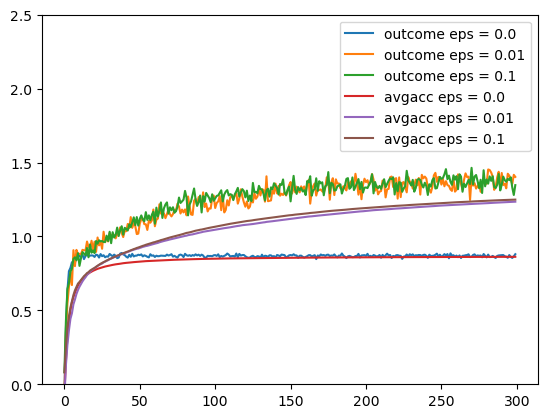

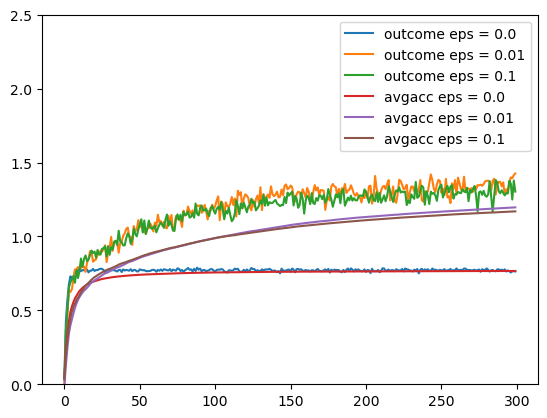

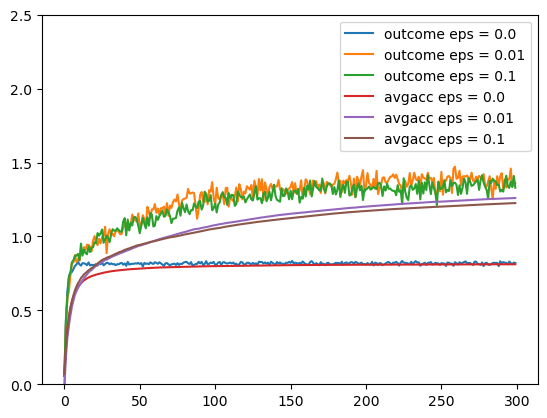

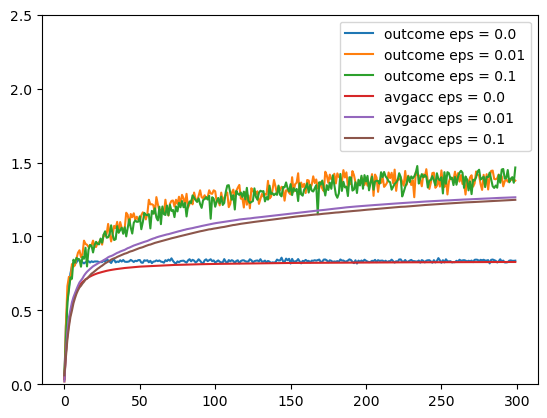

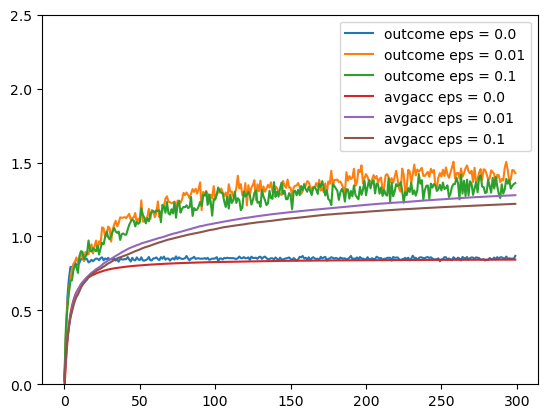

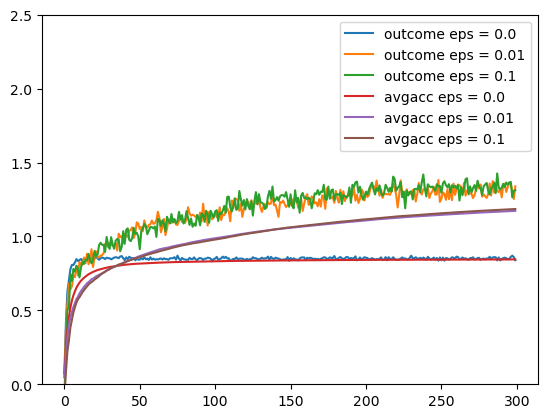

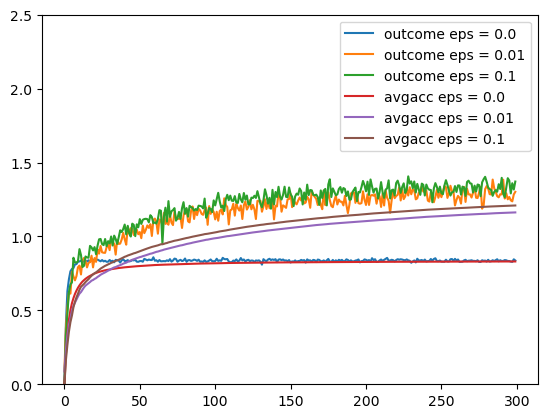

In [51]:
# 可视化：
plt.plot(avg_outcome_eps0p0,label = "outcome eps = 0.0")
plt.plot(avg_outcome_eps0p01,label = "outcome eps = 0.01")
plt.plot(avg_outcome_eps0p1,label = "outcome eps = 0.1")

plt.plot(avg_avgacc_eps0p0,label = "avgacc eps = 0.0")
plt.plot(avg_avgacc_eps0p01,label = "avgacc eps = 0.01")
plt.plot(avg_avgacc_eps0p1,label = "avgacc eps = 0.1")
plt.ylim(0,2.5)
plt.legend()
plt.show()

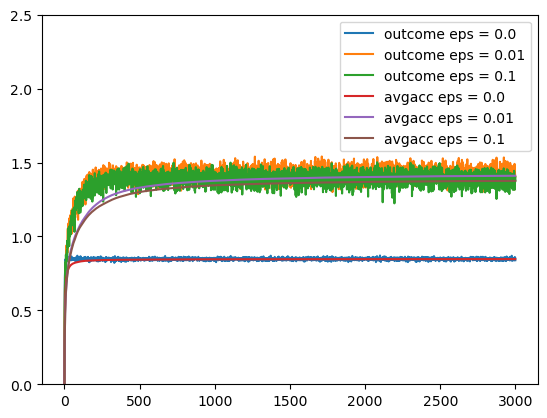

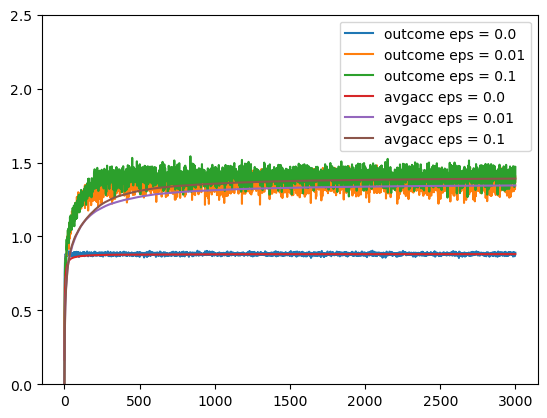

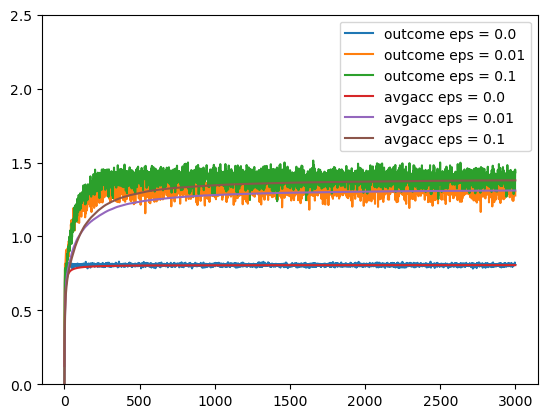

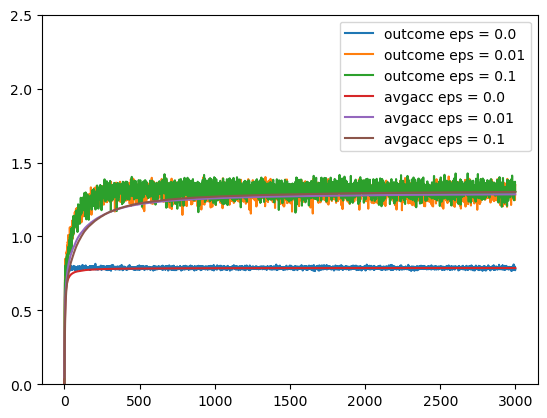

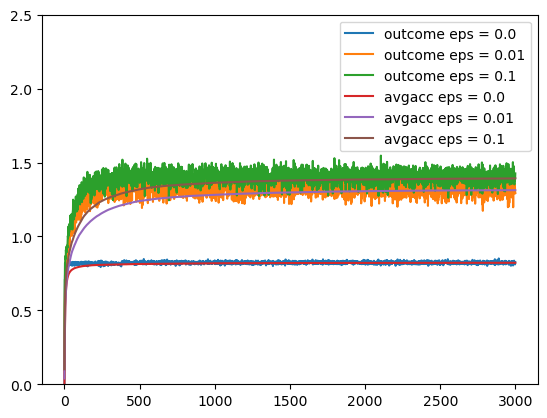

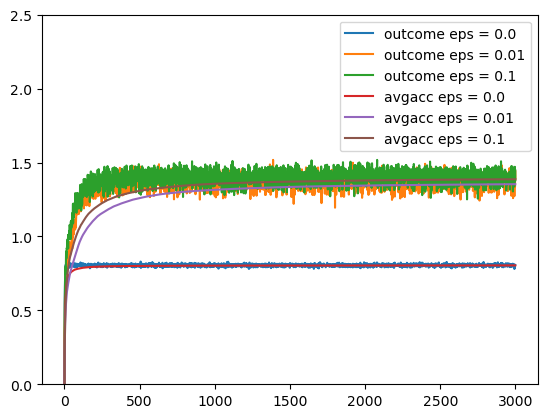

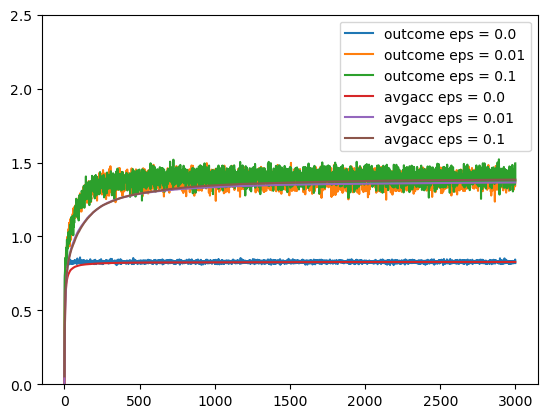

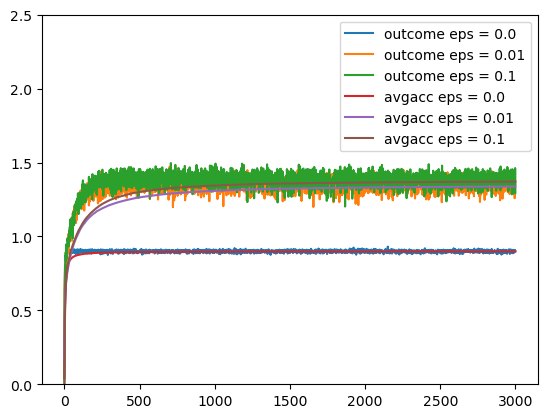

In [52]:
Nexp = 200            # 试验次数
Npulls = 3000          #  摇臂次数

avg_outcome_eps0p0 = np.zeros(Npulls)
avg_outcome_eps0p01 = np.zeros(Npulls)
avg_outcome_eps0p1 = np.zeros(Npulls)
avg_avgacc_eps0p0 = np.zeros(Npulls)
avg_avgacc_eps0p01 = np.zeros(Npulls)
avg_avgacc_eps0p1 = np.zeros(Npulls)


for i in range(Nexp):
    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.0)
    avg_outcome_eps0p0+= step_reword
    avg_avgacc_eps0p0 += avgacc_reword


    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p01+= step_reword
    avg_avgacc_eps0p01 += avgacc_reword

    bandit = Bandit()
    [step_reword, avgacc_reword] = experiment(bandit,Npulls,0.1)
    avg_outcome_eps0p1+= step_reword
    avg_avgacc_eps0p1 += avgacc_reword

#多次实验求平均
avg_outcome_eps0p0 /= float(Nexp)
avg_outcome_eps0p01 /= float(Nexp)
avg_outcome_eps0p1 /= float(Nexp)
avg_avgacc_eps0p0 /= float(Nexp)
avg_avgacc_eps0p01 /= float(Nexp)
avg_avgacc_eps0p1 /= float(Nexp)

plt.plot(avg_outcome_eps0p0,label = "outcome eps = 0.0")
plt.plot(avg_outcome_eps0p01,label = "outcome eps = 0.01")
plt.plot(avg_outcome_eps0p1,label = "outcome eps = 0.1")

plt.plot(avg_avgacc_eps0p0,label = "avgacc eps = 0.0")
plt.plot(avg_avgacc_eps0p01,label = "avgacc eps = 0.01")
plt.plot(avg_avgacc_eps0p1,label = "avgacc eps = 0.1")
plt.ylim(0,2.5)
plt.legend()
plt.show()

可以看到，在epsilon = 0 时，每次选择的摇臂k都是当前收益最大的那个，几乎没有做任何随机选择，其收益是最差的。

当epsilon = 0.01 时，表现也不错

当epsilon = 0.1 时，收益最高

请问为什么更新收益函数update_est最后要乘上alpha，使得摇臂次数越多，收益更新的权重越少？
2021-11-08

这个alpha就是为了更新当前臂的平均收益的，假设当前臂拉到了第N次，当前回报为reward，该臂第N-1次拉完后的平均回报为estvalues[action]，因此拉了第N次后的平均回报为(est_values[action]*(N-1)+reward)/N，这个除以N操作也就是代码里的乘上alpha

1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
3
2
1
3
1
1
1
1
1
1
1
1
1
1
2
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
1
2
1
1
1
3
2
1
1
2
2
2
1
2
1
2
2
3
3
2
2
2
2
3
1
2
2
2
2
2
3
2
2
1
1
1
2
2
2
2
1
1
2
2
1
1
2
1
1
2
2
2
2
1
2
2
2
2
3
2
1
2
1
2
2
1
1
1
2
2
1
2
3
1
2
1
3
2
2
1
3
2
2
2
1
2
2
1
1
2
2
3
2
2
1
3
2
2
2


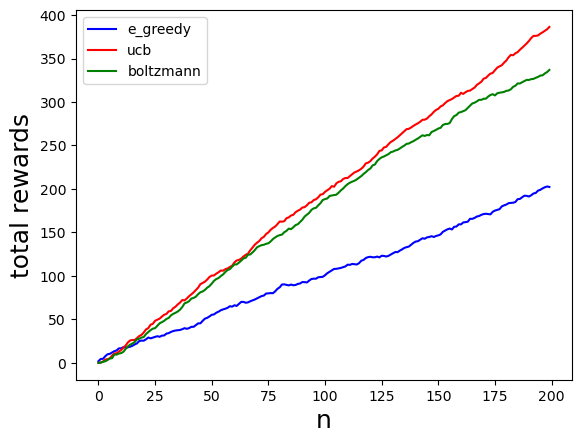

In [53]:
# 多臂赌博机
import numpy as np
import matplotlib.pyplot as plt

class KB_Game:
    def __init__(self,*args,**kwargs):
        # 属性
        # q 每个臂的平均回报，假设臂的数目是3，初始值都为0.0
        self.q = np.array([0.0,0.0,0.0])
        # action_counts 摇动每个臂的次数，初始值为0
        self.action_counts = np.array([0,0,0])
        # current_cumulative_rewards 当前累积回报总和，初始值为0.0
        self.current_cumulate_rewards=0.0
        # action 动作空间
        self.actions = [1,2,3]
        # counts 玩家玩游戏的次数
        self.counts = 0
        # counts_history 玩家玩游戏的次数记录
        self.counts_history = []
        # cumulative_rewards_history 累积回报的记录
        self.cumulative_rewards_history = []
        # a 玩家当前动作，初始值可以设为任意一个动作
        self.a = 1
        # reward 当前回报 初始为0
        self.reward = 0

    # 模拟多臂赌博机如何给出回报
    # 输入为动作
    # 输出为回报
    def step(self,a):
        r = 0
        if a == 1:
            r = np.random.normal(1,1)
        if a == 2:
            r = np.random.normal(2,1)
        if a == 3:
            r = np.random.normal(1.5,1)
        return r

    # 三种选择动作的策略方法
    # 输入为策略policy， 有3个policy: e_greedy,ucb,boltzmann
    # 参数字典**kwargs用于传递相应策略所对的超参数,e_greedy——epsilon，ucb——c_ratio,boltzmann——temerature
    def choose_action(self,policy,**kwargs):
        action = 0

        if policy == 'e_greedy':
            if np.random.random()<kwargs['epsilon']:
                action = np.random.randint(1,4)#1，2，3任意选
            else:
                action = np.argmax(self.q)+1

        # UCB中，N(a)在分母，因此第一次是依次摇动每个臂，程序判断每个动作的次数，如果有为0的则选择该动作
        if policy == 'ucb':
            c_ratio = kwargs['c_ratio']
            if 0 in self.action_counts:
                action = np.where(self.action_counts==0)[0][0]+1
            else:
                value = self.q +c_ratio*np.sqrt(np.log(self.counts)/self.action_counts)
                action = np.argmax(value)+1

        if policy == 'boltzmann':
            tau = kwargs['temperature']
            p = np.exp(self.q/tau)/(np.sum(np.exp(self.q/tau)))
            action = np.random.choice([1,2,3],p=p.ravel())# 用p的规则在[1,2,3]中抽样

        return action

    # 交互学习训练
    # 输入为play_total 要训练的总次数;policy 训练的策略；**kwargs 超参数字典
    # 智能体通过要学习的策略选择动作，再将动作传给step()，从多臂赌博机中获得回报r,智能体根据立即回报更新每个动作的平均回报q,计算当前的累积回报并保存
    def train(self,play_total,policy,**kwargs):
        reward_1 = []
        reward_2 = []
        reward_3 = []
        for i in range(play_total):
            action = 0
            if policy == 'e_greedy':
                action = self.choose_action(policy,epsilon=kwargs['epsilon'])
            if policy == 'ucb':
                action = self.choose_action(policy,c_ratio=kwargs['c_ratio'])
            if policy == 'boltzmann':
                action = self.choose_action(policy,temperature=kwargs['temperature'])
            self.a = action
            # print(self.a)
            # 与环境交互一次
            self.r = self.step(self.a)
            self.counts += 1
            # 更新值函数
            self.q[self.a-1] = (self.q[self.a-1]*self.action_counts[self.a-1]+self.r)/(self.action_counts[self.a-1] +1)
            self.action_counts += 1
            reward_1.append([self.q[0]])
            reward_2.append([self.q[1]])
            reward_3.append([self.q[2]])
            self.current_cumulate_rewards += self.r
            self.cumulative_rewards_history.append(self.current_cumulate_rewards)
            self.counts_history.append(i)

    # 每次训练新policy时，需要将成员变量进行重置
    def reset(self):
        self.q = np.array([0.0,0.0,0.0])
        self.action_counts = np.array([0,0,0])
        self.current_cumulate_rewards = 0.0
        self.counts = 0
        self.counts_history = []
        self.cumulative_rewards_history = []
        self.a = 1
        self.reward = 0

    # 画图 更直观比较不同策略的性能
    # 参数为colors 曲线的颜色,policy
    def plot(self,colors,policy,style):
        plt.figure(1)
        plt.plot(self.counts_history,self.cumulative_rewards_history,colors,label=policy)
        plt.legend()# 加上图例
        plt.xlabel('n',fontsize=18)
        plt.ylabel('total rewards',fontsize=18)

# KB_Game类完成了
# 写主程序
if __name__ == '__main__':
    # step1:设置随机种子，以免我们每次结果都一样
    np.random.seed(0)
    # step2:将类KB_Game进行实例化
    k_gamble = KB_Game()
    # step3: 设置总的训练次数total,设置每个策略的超参数,调用类的训练方法进行学习
    total = 200
    k_gamble.train(play_total=total,policy='e_greedy',epsilon=0.05)
    # step4: 学习完后调用画图方法
    k_gamble.plot(colors='b',policy='e_greedy',style='--')
    # step5: 进行初始化，训练另一个策略
    k_gamble.reset()
    k_gamble.train(play_total=total, policy='ucb', c_ratio=0.5)
    k_gamble.plot(colors='r', policy='ucb', style='-.')
    k_gamble.reset()
    k_gamble.train(play_total=total, policy='boltzmann', temperature=1)
    k_gamble.plot(colors='g', policy='boltzmann', style='-')
    k_gamble.reset()
    # step6: 画图，显示3种策略的学习和训练过程
    plt.show()

很明显，UCB比其他两个策略要好。